In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LinearRegression
import seaborn as sns; 
from sklearn import metrics
sns.set(style="ticks", color_codes=True)
%matplotlib inline
import time
import itertools

## Reading the data

In [2]:
# Normalize the data frame values such that the std of each column will be approximately 1
def norm_fun(df):
    for k in df.columns.values:
        col_mean=df[k].mean()
        col_len=len(df)
        Denom=np.sqrt(1/col_len*np.sum((df[k]-col_mean)**2))
        df[k] = df[k].apply(lambda x: x/Denom)
    return df

In [3]:
d_test=pd.read_pickle('d_test.pkl')
d_test.reset_index(inplace=True,drop=True)

d_train=pd.read_pickle('d_train.pkl')
d_train.reset_index(inplace=True,drop=True)

# d_train['y_train10']=np.log10(d_train.y_train)
# # d_train['Delta_T_log2']=np.log(d_train.Delta_T)

# d_train['y_train2']=np.log(d_train.y_train)

X=d_train.iloc[:,0:6]# d_test.iloc[:,0:6]
X_train=norm_fun(X)
y_train=d_train['y_train']
d_train.iloc[:,0:6]=X_train
y_train=np.log(y_train)

X_test=d_test.iloc[:,0:6]# d_test.iloc[:,0:6]
X_test=norm_fun(X_test)
d_test.iloc[:,0:6]=X_test
y_test=d_test['y_test']
y_test=np.log(y_test)


# 1 - LR

In [33]:
reg = LinearRegression(normalize=True)
def apply_lrg(X_train,y_train,X_test,y_test):
    
    reg.fit(X_train, y_train)
    y_predicted=reg.predict(X_test)
#     print("r2=",metrics.r2_score(y_test, y_predicted))
#     print("MAE=",metrics.mean_absolute_error(y_test.values,y_predicted))
#     print("RSS=",np.sum((y_test.values-y_predicted)**2))
    return metrics.r2_score(np.exp(y_test), np.exp(y_predicted)),metrics.mean_absolute_error(np.exp(y_test.values),np.exp(y_predicted)),np.sum((np.exp(y_test.values)-np.exp(y_predicted))**2)

In [5]:
start_time = time.time()
R2,MAE,RSS=apply_lrg(X_train,y_train,X_test,y_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.18577051162719727 seconds ---


In [34]:
start_time = time.time()
R2_buf=[]
MAE_buf=[]
RSS_buf=[]
for k in np.arange(1,7):
    buf=np.asarray(list(itertools.combinations(np.arange(0,6), k)))
    for item in buf:
        X_tr_comb=X_train.iloc[:,item]
        X_ts_comb=X_test.iloc[:,item]
        R2,MAE,RSS=apply_lrg(X_tr_comb,y_train,X_ts_comb,y_test)
        R2_buf.append(R2)
        MAE_buf.append(MAE)
        RSS_buf.append(RSS)
print("--- %s seconds ---" % (time.time() - start_time))       

--- 7.619548559188843 seconds ---


In [35]:
ls=[]
for k in np.arange(1,7):
    ls.extend(list(itertools.combinations(np.arange(0,6), k)))
idx=MAE_buf.index(min(MAE_buf))
ls[idx]
print("MAE=",min(MAE_buf))
X_train.columns.values[list(ls[idx])]

MAE= 9.190285322160822


array(['Delta_T', 'FirstPass_Temp', 'U'], dtype=object)

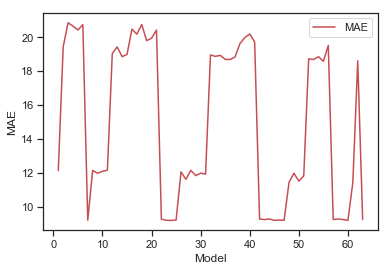

In [36]:
plt.plot(np.arange(1,len(ls)+1), MAE_buf, 'r-',
         label='MAE')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [9]:
np.min(MAE_buf)

9.190285322160822

In [37]:
MAE_Linear_reg=pd.DataFrame(MAE_buf,columns=['Linear_reg'])
MAE_Linear_reg.to_csv('Linear_reg.csv')

### Using only the important features

In [20]:
# X_test=X_test[X_train.columns.values[list(ls[idx])]]
# X_train=X_train[X_train.columns.values[list(ls[idx])]]

In [21]:
# reg = LinearRegression(normalize=True).fit(X_train, y_train)
# y_predicted=reg.predict(X_test)
# print("r2=",metrics.r2_score(y_test, y_predicted))
# print("MAE=",metrics.mean_absolute_error(np.exp(y_test.values),np.exp(y_predicted)))
# print("RSS=",np.sum((y_test.values-y_predicted)**2))
# plt.plot(X_test.Delta_T[1:1000], y_test[1:1000], 'r.',label='Test')
# plt.plot(X_test.Delta_T[1:1000], y_predicted[1:1000], 'b.',label='Predicted')
# plt.xlabel('$\Delta(t)$')
# plt.ylabel('$\log(tem)$')
# plt.legend()
# plt.show()

In [22]:
# plt.plot(X_test.Delta_T[1:1000], np.exp(y_test[1:1000]), 'b.',label='Test')
# plt.plot(X_test.Delta_T[1:1000], np.exp(y_predicted[1:1000]), 'r.',label='Predicted')
# plt.xlabel('$\Delta(t)$')
# plt.ylabel('$Tem.$')
# plt.legend()
# plt.show()

# 2- Ridge

r2= 0.5612468562428835
MAE= 9.242662281055512
RSS= 15990.162032790382


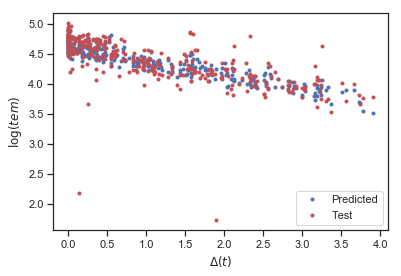

In [23]:
clf = Ridge()
clf.fit(X_train, y_train) 
y_predicted=clf.predict(X_test)
print("r2=",metrics.r2_score(y_test, y_predicted))
print("MAE=",metrics.mean_absolute_error(np.exp(y_test.values),np.exp(y_predicted)))
print("RSS=",np.sum((y_test.values-y_predicted)**2))
plt.plot(X_test.Delta_T[1:300], y_predicted[1:300], 'b.',label='Predicted')
plt.plot(X_test.Delta_T[1:300], y_test[1:300], 'r.',label='Test')
plt.xlabel('$\Delta(t)$')
plt.ylabel('$\log(tem)$')
plt.legend()
plt.show()

In [4]:
Reg = Ridge()
def apply_Reg(X_train,y_train,X_test,y_test):
    Reg.fit(X_train, y_train)
    y_predicted=Reg.predict(X_test)
    return metrics.r2_score(np.exp(y_test), np.exp(y_predicted)),metrics.mean_absolute_error(np.exp(y_test.values),np.exp(y_predicted)),np.sum((np.exp(y_test.values)-np.exp(y_predicted))**2)
start_time = time.time()
R2_buf=[]
MAE_buf=[]
RSS_buf=[]
for k in np.arange(1,7):
    buf=np.asarray(list(itertools.combinations(np.arange(0,6), k)))
    for item in buf:
        X_tr_comb=X_train.iloc[:,item]
        X_ts_comb=X_test.iloc[:,item]
        R2,MAE,RSS=apply_Reg(X_tr_comb,y_train,X_ts_comb,y_test)
        R2_buf.append(R2)
        MAE_buf.append(MAE)
        RSS_buf.append(RSS)
print("--- %s seconds ---" % (time.time() - start_time))       

ls=[]
for k in np.arange(1,7):
    ls.extend(list(itertools.combinations(np.arange(0,6), k)))
idx=MAE_buf.index(min(MAE_buf))
ls[idx]
print("MAE=",min(MAE_buf))
X_train.columns.values[list(ls[idx])]

--- 5.3639702796936035 seconds ---
MAE= 9.190289571759106


array(['Delta_T', 'FirstPass_Temp', 'U'], dtype=object)

In [5]:
MAE_Ridge=pd.DataFrame(MAE_buf,columns=['Ridge'])
MAE_Ridge.to_csv('Ridge.csv')

# 3- RidgeCV

r2= 0.700444750666835
MAE= 9.242697051231673
RSS= 56926927.953867614


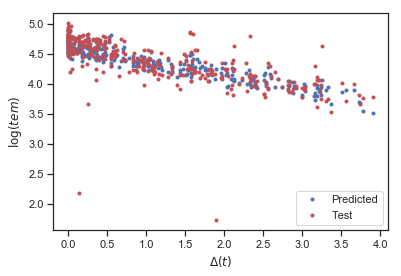

In [26]:
clf = RidgeCV(cv=10)
clf.fit(X_train, y_train) 
y_predicted=clf.predict(X_test)
print("r2=",metrics.r2_score(np.exp(y_test), np.exp(y_predicted)))
print("MAE=",metrics.mean_absolute_error(np.exp(y_test.values),np.exp(y_predicted)))
print("RSS=",np.sum((np.exp(y_test.values)-np.exp(y_predicted))**2))
plt.plot(X_test.Delta_T[1:300], y_predicted[1:300], 'b.',label='Predicted')
plt.plot(X_test.Delta_T[1:300], y_test[1:300], 'r.',label='Test')
plt.xlabel('$\Delta(t)$')
plt.ylabel('$\log(tem)$')
plt.legend()
plt.show()

In [6]:
Reg = RidgeCV(cv=10)
def apply_Regcv(X_train,y_train,X_test,y_test):
    Reg.fit(X_train, y_train)
    y_predicted=Reg.predict(X_test)
    return metrics.r2_score(np.exp(y_test), np.exp(y_predicted)),metrics.mean_absolute_error(np.exp(y_test.values),np.exp(y_predicted)),np.sum((np.exp(y_test.values)-np.exp(y_predicted))**2)

start_time = time.time()
R2_buf=[]
MAE_buf=[]
RSS_buf=[]
for k in np.arange(1,7):
    buf=np.asarray(list(itertools.combinations(np.arange(0,6), k)))
    for item in buf:
        X_tr_comb=X_train.iloc[:,item]
        X_ts_comb=X_test.iloc[:,item]
        R2,MAE,RSS=apply_Reg(X_tr_comb,y_train,X_ts_comb,y_test)
        R2_buf.append(R2)
        MAE_buf.append(MAE)
        RSS_buf.append(RSS)
print("--- %s seconds ---" % (time.time() - start_time))       

ls=[]
for k in np.arange(1,7):
    ls.extend(list(itertools.combinations(np.arange(0,6), k)))
idx=MAE_buf.index(min(MAE_buf))
ls[idx]
print("MAE=",min(MAE_buf))
X_train.columns.values[list(ls[idx])]

--- 200.56842732429504 seconds ---
MAE= 9.190289571759106


array(['Delta_T', 'FirstPass_Temp', 'U'], dtype=object)

In [7]:
MAE_Ridgecv=pd.DataFrame(MAE_buf,columns=['Ridgecv'])
MAE_Ridgecv.to_csv('Ridgecv.csv')

# 4- Lasso

r2= -0.02919189917867393
MAE= 20.91086927228987
RSS= 195585733.26847708


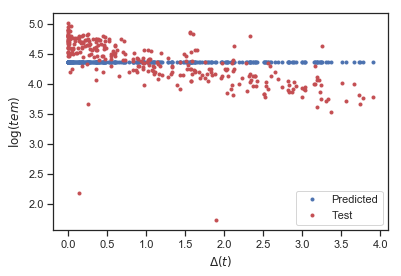

In [28]:
las = Lasso().fit(X_train, y_train)
y_predicted=las.predict(X_test)
print("r2=",metrics.r2_score(np.exp(y_test), np.exp(y_predicted)))
print("MAE=",metrics.mean_absolute_error(np.exp(y_test.values),np.exp(y_predicted)))
print("RSS=",np.sum((np.exp(y_test.values)-np.exp(y_predicted))**2))
plt.plot(X_test.Delta_T[1:300], y_predicted[1:300], 'b.',label='Predicted')
plt.plot(X_test.Delta_T[1:300], y_test[1:300], 'r.',label='Test')
plt.xlabel('$\Delta(t)$')
plt.ylabel('$\log(tem)$')
plt.legend()
plt.show()

In [18]:
# estimator = Lasso()
# featureSelection = SelectFromModel(estimator)
# featureSelection.fit(X_train, y_train)
# selectedFeatures = featureSelection.transform(X_train)
# X.columns[featureSelection.get_support()]

In [8]:
def apply_las(X_train,y_train,X_test,y_test):
    las = Lasso()
    las.fit(X_train, y_train)
    y_predicted=las.predict(X_test)
    return metrics.r2_score(np.exp(y_test), np.exp(y_predicted)),metrics.mean_absolute_error(np.exp(y_test.values),np.exp(y_predicted)),np.sum((np.exp(y_test.values)-np.exp(y_predicted))**2)

start_time = time.time()
R2_buf=[]
MAE_buf=[]
RSS_buf=[]
for k in np.arange(1,7):
    buf=np.asarray(list(itertools.combinations(np.arange(0,6), k)))
    for item in buf:
        X_tr_comb=X_train.iloc[:,item]
        X_ts_comb=X_test.iloc[:,item]
        R2,MAE,RSS=apply_las(X_tr_comb,y_train,X_ts_comb,y_test)
        R2_buf.append(R2)
        MAE_buf.append(MAE)
        RSS_buf.append(RSS)
print("--- %s seconds ---" % (time.time() - start_time))       

ls=[]
for k in np.arange(1,7):
    ls.extend(list(itertools.combinations(np.arange(0,6), k)))
idx=MAE_buf.index(min(MAE_buf))
ls[idx]
print("MAE=",min(MAE_buf))
X_train.columns.values[list(ls[idx])]

--- 6.649721145629883 seconds ---
MAE= 20.91086927228987


array(['Delta_T'], dtype=object)

In [9]:
MAE_Lasso=pd.DataFrame(MAE_buf,columns=['Lasso'])
MAE_Lasso.to_csv('Lasso.csv')